Following this: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d 

Tensorflow (also Keras) allow us to import and download the MNIST dataset directly from their API:

In [10]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


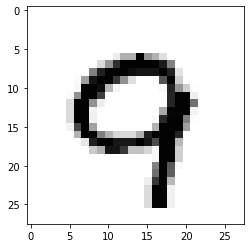

1


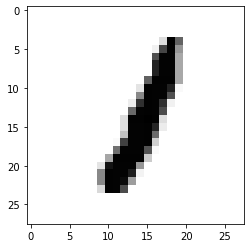

7


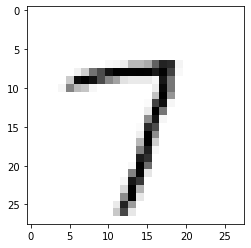

In [11]:
import matplotlib.pyplot as plt
from random import sample
# %matplotlib inline # Only use this if using iPython
for i in sample(range(60000), k=3):
    print(y_train[i])
    plt.imshow(x_train[i], cmap='Greys')
    plt.show()

Reshape and normalize:

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Simplest API = Keras with Sequential model (plain stack of layers)

In [13]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) # dropout rate
model.add(Dense(10,activation=tf.nn.softmax))

2021-10-15 15:45:14.066783: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-15 15:45:14.066849: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brice-XPS15): /proc/driver/nvidia/version does not exist
2021-10-15 15:45:14.067729: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fit the model:

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

2021-10-15 15:49:28.251182: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2006 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0814 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0580 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0343 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0288 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0211 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0199 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 24s 13ms

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0615 - accuracy: 0.9855


[0.06152334064245224, 0.9854999780654907]

9


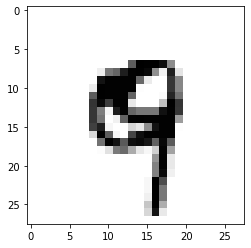

In [16]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())